In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('aggregated_plants.csv')

# Dropping non-relevant columns
df = df.drop(columns=['Plant_Species', 'Reference', 'BitInterpretations'])

# Separating features and target
features = df.drop('Salmonella Typhimurium', axis=1)
target = df['Salmonella Typhimurium']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# ExtraTrees model for GridSearchCV
extra_trees = ExtraTreesClassifier(random_state=42)

# GridSearchCV model
grid_search = GridSearchCV(extra_trees, param_grid=param_grid, cv=3, verbose=0, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Importing Necessary Libraries
We need to import various libraries from Scikit-learn for model building, evaluation, and visualization. Pandas and NumPy are used for data manipulation.


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest, ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance


# Loading and Preprocessing Data
Load the dataset and preprocess it by dropping non-relevant columns. Apply Isolation Forest for outlier detection and removal.


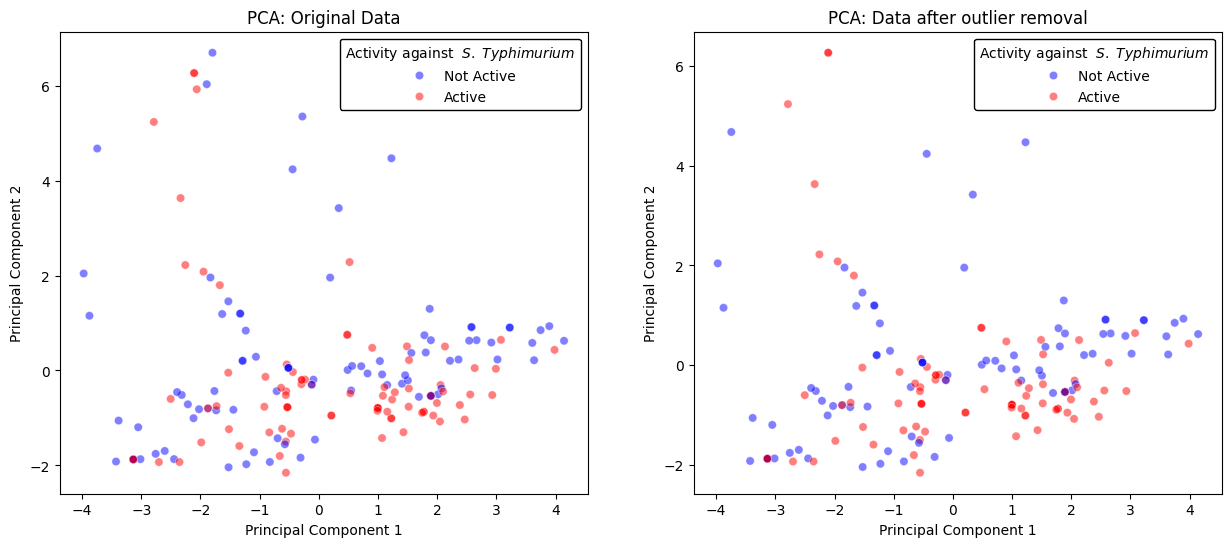

In [3]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv('aggregated_plants.csv')

# Dropping non-relevant columns
df = df.drop(columns=['Plant_Species', 'Reference', 'BitInterpretations'])

# Separating features and target
features = df.drop('Salmonella Typhimurium', axis=1)
target = df['Salmonella Typhimurium']

# Apply PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# Apply Isolation Forest on original features to detect outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers_pred = iso_forest.fit_predict(features)

# Filter out the outliers based on predictions
features_filtered = features[outliers_pred != -1]
target_filtered = target[outliers_pred != -1]

# Apply PCA on filtered features for visualization
features_filtered_pca = pca.transform(features_filtered)

# Mapping target values to 'Active' and 'Not Active'
activity_labels = pd.Series(target).map({1: 'Active', 0: 'Not Active'}).values
activity_labels_filtered = pd.Series(target_filtered).map({1: 'Active', 0: 'Not Active'}).values

# Plotting
plt.figure(figsize=(15, 6))

# Original Data
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=activity_labels,
                alpha=0.5, palette={'Active': 'red', 'Not Active': 'blue'})
plt.title('PCA: Original Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
legend = ax1.legend(title="Activity against  $\it{S.\ Typhimurium}$", frameon=True, facecolor='white')
legend.get_frame().set_alpha(None)
legend.get_frame().set_edgecolor('black')

# Data After Outlier Removal
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(x=features_filtered_pca[:, 0], y=features_filtered_pca[:, 1], hue=activity_labels_filtered,
                alpha=0.5, palette={'Active': 'red', 'Not Active': 'blue'})
plt.title('PCA: Data after outlier removal')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
legend = ax2.legend(title="Activity against  $\it{S.\ Typhimurium}$", frameon=True, facecolor='white')
legend.get_frame().set_alpha(None)
legend.get_frame().set_edgecolor('black')

# Save the figure
plt.savefig('charts/outlier_detection_result.png', dpi=300, bbox_inches='tight')

plt.show()



# Train-Test Split
Split the dataset into training and testing sets to evaluate the performance of the model.


In [4]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_filtered, target_filtered, test_size=0.2, random_state=42)


# Model Training with GridSearchCV
Use GridSearchCV to find the best parameters for the ExtraTreesClassifier and train the model.


Top features:
1. feature Bit_875 (0.0480)
2. feature Bit_1607 (0.0351)
3. feature Bit_1602 (0.0299)
4. feature Bit_549 (0.0233)
5. feature Bit_1950 (0.0170)
6. feature Bit_1754 (0.0167)
7. feature Bit_287 (0.0161)
8. feature Bit_536 (0.0150)
9. feature Bit_1930 (0.0144)
10. feature Bit_741 (0.0125)
11. feature Bit_1750 (0.0123)
12. feature Bit_1778 (0.0118)
13. feature Bit_859 (0.0102)
14. feature Bit_1804 (0.0096)
15. feature Bit_559 (0.0096)


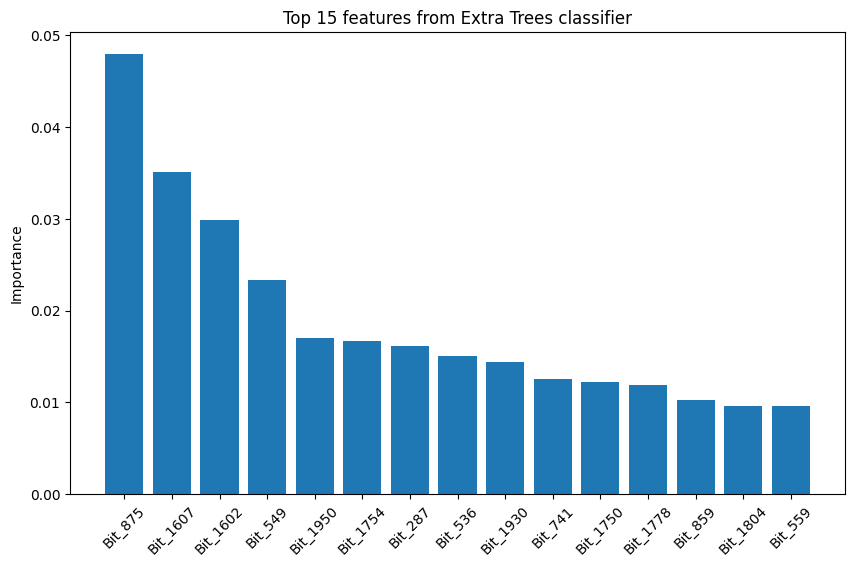

Training Set Metrics:
      Fold  Accuracy  Sensitivity  Specificity       PPV       NPV
0        1  0.719697     0.477612     0.969231  0.941176  0.642857
1        2  0.706767     0.514706     0.907692  0.853659  0.641304
2        3  0.714286     0.462687     0.969697  0.939394  0.640000
3        4  0.706767     0.537313     0.878788  0.818182  0.651685
4        5  0.721805     0.567164     0.878788  0.826087  0.666667
5  Average  0.713864     0.511896     0.920839  0.875700  0.648503

Testing Set Metrics:
      Fold  Accuracy  Sensitivity  Specificity       PPV       NPV
0        1  0.676471     0.411765     0.941176  0.875000  0.615385
1        2  0.696970     0.562500     0.823529  0.750000  0.666667
2        3  0.696970     0.470588     0.937500  0.888889  0.625000
3        4  0.666667     0.529412     0.812500  0.750000  0.619048
4        5  0.636364     0.352941     0.937500  0.857143  0.576923
5  Average  0.674688     0.465441     0.890441  0.824206  0.620604


In [17]:

# Define the number of top features
TOP_FEATURES = 15

# Use ExtraTreesClassifier to determine feature importances
forest = ExtraTreesClassifier(
    bootstrap=True, 
    criterion='entropy', 
    max_depth=15, 
    max_features='sqrt', 
    min_samples_leaf=2, 
    min_samples_split=4, 
    n_estimators=90, 
    random_state=42
)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]

# Print top features
print('Top features:')
top_features = []
for f in range(TOP_FEATURES):
    feature_name = X_train.columns[indices[f]]
    top_features.append(feature_name)
    print(f'{f + 1}. feature {feature_name} ({importances[indices[f]]:.4f})')

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.title('Top 15 features from Extra Trees classifier')
plt.bar(range(TOP_FEATURES), importances[indices], align='center')
plt.xticks(range(TOP_FEATURES), [X_train.columns[i] for i in indices], rotation=45)
plt.ylabel('Importance')



# Save the figure
plt.savefig('charts/features_importance.png', dpi=300, bbox_inches='tight')
plt.show()


# Selecting the top features for training
top_feature_names = features_filtered.columns[indices[:TOP_FEATURES]]
X_top_features = features_filtered[top_feature_names]
y = target_filtered


from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

# Assuming X_top_features, y are already defined

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Initialize the ExtraTreesClassifier with tuned parameters
extra_trees = ExtraTreesClassifier(
    bootstrap=True,
    criterion='entropy',
    max_depth=15,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=4,
    n_estimators=90,
    random_state=42
)

# Lists to store metrics for each fold
train_accuracies = []
train_sensitivities = []  # Sensitivity or Recall
train_specificities = []
train_ppvs = []  # Positive Predictive Value or Precision
train_npvs = []  # Negative Predictive Value

test_accuracies = []
test_sensitivities = []
test_specificities = []
test_ppvs = []
test_npvs = []

for train_index, test_index in skf.split(X_top_features, y):
    # Split data
    X_fold_train, X_fold_test = X_top_features.iloc[train_index], X_top_features.iloc[test_index]
    y_fold_train, y_fold_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    extra_trees.fit(X_fold_train, y_fold_train)

    # Training metrics
    y_train_pred = extra_trees.predict(X_fold_train)
    train_accuracies.append(accuracy_score(y_fold_train, y_train_pred))
    train_sensitivities.append(recall_score(y_fold_train, y_train_pred))
    train_ppvs.append(precision_score(y_fold_train, y_train_pred))
    tn, fp, fn, tp = confusion_matrix(y_fold_train, y_train_pred).ravel()
    train_specificities.append(tn / (tn + fp))
    train_npvs.append(tn / (tn + fn))

    # Testing metrics
    y_test_pred = extra_trees.predict(X_fold_test)
    test_accuracies.append(accuracy_score(y_fold_test, y_test_pred))
    test_sensitivities.append(recall_score(y_fold_test, y_test_pred))
    test_ppvs.append(precision_score(y_fold_test, y_test_pred))
    tn, fp, fn, tp = confusion_matrix(y_fold_test, y_test_pred).ravel()
    test_specificities.append(tn / (tn + fp))
    test_npvs.append(tn / (tn + fn))

# Display training set metrics
train_results_df = pd.DataFrame({
    'Fold': list(range(1, 6)) + ['Average'],
    'Accuracy': train_accuracies + [np.mean(train_accuracies)],
    'Sensitivity': train_sensitivities + [np.mean(train_sensitivities)],
    'Specificity': train_specificities + [np.mean(train_specificities)],
    'PPV': train_ppvs + [np.mean(train_ppvs)],
    'NPV': train_npvs + [np.mean(train_npvs)]
})

# Display testing set metrics
test_results_df = pd.DataFrame({
    'Fold': list(range(1, 6)) + ['Average'],
    'Accuracy': test_accuracies + [np.mean(test_accuracies)],
    'Sensitivity': test_sensitivities + [np.mean(test_sensitivities)],
    'Specificity': test_specificities + [np.mean(test_specificities)],
    'PPV': test_ppvs + [np.mean(test_ppvs)],
    'NPV': test_npvs + [np.mean(test_npvs)]
})

print("Training Set Metrics:")
print(train_results_df)

print("\nTesting Set Metrics:")
print(test_results_df)



# Cross-Validation and Evaluation Metrics
Perform Stratified K-Fold cross-validation to evaluate the model's performance on different subsets of the dataset.


In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# X_top_features and y are already defined
# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Lists to store metrics for each fold - Training
train_accuracies = []
train_sensitivities = []  # Sensitivity or Recall
train_specificities = []
train_ppvs = []  # Positive Predictive Value or Precision
train_npvs = []  # Negative Predictive Value

# Lists to store metrics for each fold - Testing
test_accuracies = []
test_sensitivities = []  # Sensitivity or Recall
test_specificities = []
test_ppvs = []  # Positive Predictive Value or Precision
test_npvs = []  # Negative Predictive Value

for train_index, test_index in skf.split(X_top_features, y):
    X_fold_train, X_fold_test = X_top_features.iloc[train_index], X_top_features.iloc[test_index]
    y_fold_train, y_fold_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on training data
    rf_classifier.fit(X_fold_train, y_fold_train)

    # Evaluate on training data
    y_train_pred = rf_classifier.predict(X_fold_train)
    train_accuracy = accuracy_score(y_fold_train, y_train_pred)
    train_tn, train_fp, train_fn, train_tp = confusion_matrix(y_fold_train, y_train_pred).ravel()
    train_sensitivity = train_tp / (train_tp + train_fn)
    train_specificity = train_tn / (train_tn + train_fp)
    train_PPV = train_tp / (train_tp + train_fp) if (train_tp + train_fp) != 0 else 0
    train_NPV = train_tn / (train_tn + train_fn) if (train_tn + train_fn) != 0 else 0
    
    train_accuracies.append(train_accuracy)
    train_sensitivities.append(train_sensitivity)
    train_specificities.append(train_specificity)
    train_ppvs.append(train_PPV)
    train_npvs.append(train_NPV)
    
    # Evaluate on testing data
    y_test_pred = rf_classifier.predict(X_fold_test)
    test_accuracy = accuracy_score(y_fold_test, y_test_pred)
    test_tn, test_fp, test_fn, test_tp = confusion_matrix(y_fold_test, y_test_pred).ravel()
    test_sensitivity = test_tp / (test_tp + test_fn)
    test_specificity = test_tn / (test_tn + test_fp)
    test_PPV = test_tp / (test_tp + test_fp) if (test_tp + test_fp) != 0 else 0
    test_NPV = test_tn / (test_tn + test_fn) if (test_tn + test_fn) != 0 else 0
    
    test_accuracies.append(test_accuracy)
    test_sensitivities.append(test_sensitivity)
    test_specificities.append(test_specificity)
    test_ppvs.append(test_PPV)
    test_npvs.append(test_NPV)

# Creating DataFrames to display results
train_results_df = pd.DataFrame({
    'Fold': list(range(1, 6)) + ['Average'],
    'Accuracy': train_accuracies + [np.mean(train_accuracies)],
    'Sensitivity(TPR)': train_sensitivities + [np.mean(train_sensitivities)],
    'Specificity(TNR)': train_specificities + [np.mean(train_specificities)],
    'PPV': train_ppvs + [np.mean(train_ppvs)],
    'NPV': train_npvs + [np.mean(train_npvs)]
})

test_results_df = pd.DataFrame({
    'Fold': list(range(1, 6)) + ['Average'],
    'Accuracy': test_accuracies + [np.mean(test_accuracies)],
    'Sensitivity(TPR)': test_sensitivities + [np.mean(test_sensitivities)],
    'Specificity(TNR)': test_specificities + [np.mean(test_specificities)],
    'PPV': test_ppvs + [np.mean(test_ppvs)],
    'NPV': test_npvs + [np.mean(test_npvs)]
})

print("Training Set Metrics:")
print(train_results_df)

print("\nTesting Set Metrics:")
print(test_results_df)


Training Set Metrics:
      Fold  Accuracy  Sensitivity(TPR)  Specificity(TNR)       PPV       NPV
0        1  0.772727          0.761194          0.784615  0.784615  0.761194
1        2  0.804511          0.779412          0.830769  0.828125  0.782609
2        3  0.796992          0.776119          0.818182  0.812500  0.782609
3        4  0.789474          0.776119          0.803030  0.800000  0.779412
4        5  0.827068          0.805970          0.848485  0.843750  0.811594
5  Average  0.798154          0.779763          0.817016  0.813798  0.783483

Testing Set Metrics:
      Fold  Accuracy  Sensitivity(TPR)  Specificity(TNR)       PPV       NPV
0        1  0.852941          0.882353          0.823529  0.833333  0.875000
1        2  0.757576          0.750000          0.764706  0.750000  0.764706
2        3  0.787879          0.764706          0.812500  0.812500  0.764706
3        4  0.787879          0.823529          0.750000  0.777778  0.800000
4        5  0.636364          0.

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt


# Assuming X_top_features and y are already defined

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Lists to store metrics for each fold - Testing
test_accuracies = []
test_mccs = []  # Matthews correlation coefficient
test_auc_roc = []  # Area Under Curve for ROC
test_auc_pr = []  # Area Under Curve for Precision-Recall

# For ROC and PR curves plotting
mean_fpr = np.linspace(0, 1, 100)
tprs = []
precisions = []
recall_rates = []

for train_index, test_index in skf.split(X_top_features, y):
    X_fold_train, X_fold_test = X_top_features.iloc[train_index], X_top_features.iloc[test_index]
    y_fold_train, y_fold_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on training data
    rf_classifier.fit(X_fold_train, y_fold_train)

    # Evaluate on testing data
    y_test_pred = rf_classifier.predict(X_fold_test)
    y_test_pred_proba = rf_classifier.predict_proba(X_fold_test)[:, 1]  # Probabilities for positive class
    
    test_accuracy = accuracy_score(y_fold_test, y_test_pred)
    test_mcc = matthews_corrcoef(y_fold_test, y_test_pred)
    
    # ROC
    fpr, tpr, thresholds = roc_curve(y_fold_test, y_test_pred_proba)
    roc_auc = auc(fpr, tpr)
    test_auc_roc.append(roc_auc)
    
    # Interpolate the TPR (True Positive Rate) for plotting
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0  # Ensure start at zero
    
    # PR
    precision, recall, _ = precision_recall_curve(y_fold_test, y_test_pred_proba)
    pr_auc = auc(recall, precision)
    test_auc_pr.append(pr_auc)
    
    # Interpolate Precision and Recall for plotting
    precisions.append(np.interp(mean_fpr, recall[::-1], precision[::-1]))
    recall_rates.append(mean_fpr)
    
    test_accuracies.append(test_accuracy)
    test_mccs.append(test_mcc)

# Plotting ROC Curve
plt.figure(figsize=(10, 5))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f)' % (mean_auc), lw=2, alpha=.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Plotting Precision-Recall Curve
plt.figure(figsize=(10, 5))
mean_precision = np.mean(precisions, axis=0)
mean_recall = np.mean(recall_rates, axis=0)
mean_pr_auc = auc(mean_recall, mean_precision)
plt.plot(mean_recall, mean_precision, color='b', label=r'Mean PR (AUC = %0.2f)' % (mean_pr_auc), lw=2, alpha=.8)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Creating DataFrames to display results
test_results_df = pd.DataFrame({
    'Fold': list(range(1, 6)),
    'Accuracy': test_accuracies,
    'MCC': test_mccs,
    'AUC ROC': test_auc_roc,
    'AUC PR': test_auc_pr
})

print("\nTesting Set Metrics:")
print(test_results_df)




ROC Curve saved to: inspection/roc_curve.png
Precision-Recall Curve saved to: inspection/pr_curve.png


In [13]:
import os
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Assuming rf_classifier is already trained and X_top_features, y are defined

# Create a new directory called 'pdp' to save the plots if it does not exist
os.makedirs('pdp', exist_ok=True)

# Generate and save partial dependence plots for all features
for feature_index in range(X_top_features.shape[1]):
    fig, ax = plt.subplots(figsize=(8, 4))
    display = PartialDependenceDisplay.from_estimator(
        rf_classifier,
        X_top_features,
        features=[feature_index],
        ax=ax,
        kind="average"
    )
    plt.subplots_adjust(top=0.9)  # Adjust layout to fit suptitle
    
    # Save the plot to the 'pdp' directory with 300 dpi resolution
    plot_path = f'pdp/pdp_feature_{feature_index}.png'
    plt.savefig(plot_path, dpi=300)
    plt.close()  # Close the plot to free up memory

# Print out a confirmation message
print("All partial dependence plots have been saved in the 'pdp' directory.")


All partial dependence plots have been saved in the 'pdp' directory.


In [552]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



# Transpose the DataFrames and combine training and testing metrics into one DataFrame
train_transposed = train_results_df.set_index('Fold').T
test_transposed = test_results_df.set_index('Fold').T

# Add a prefix to distinguish between training and testing metrics
train_transposed = train_transposed.add_prefix('Train Fold ')
test_transposed = test_transposed.add_prefix('Test Fold ')

# Combine the training and testing metrics into a single DataFrame
combined_transposed = pd.concat([train_transposed, test_transposed], axis=1)

# Format the combined DataFrame for better readability and ensure two decimals
def format_transposed_dataframe_for_google_docs(df):
    formatted_df = df.applymap(lambda x: f"{x:.2f}")
    # Create a header from the column names
    header = '\t'.join(df.columns)
    # Combine each row's values into a single string with tab separation
    formatted_rows = formatted_df.apply(lambda x: '\t'.join([str(val) for val in x]), axis=0)
    # Combine header and rows for final output
    formatted_str = header + '\n' + '\n'.join(formatted_rows.index + '\t' + formatted_rows.values)
    return formatted_str

# Apply the formatting function to the combined transposed DataFrame
formatted_combined_transposed_str = format_transposed_dataframe_for_google_docs(combined_transposed)




# Adjusted function to format only numeric values
def prepare_for_stacking_with_labels(df, label):
    # Transpose the DataFrame to have metrics as rows
    transposed_df = df.T
    # Apply formatting selectively to numeric values
    formatted_df = transposed_df.applymap(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)
    # Insert a row for the dataset label at the beginning
    formatted_df = pd.concat([pd.DataFrame({col: label if idx == 0 else "" for idx, col in enumerate(formatted_df.columns)}, index=[0]), formatted_df], ignore_index=False)
    return formatted_df

# Prepare both DataFrames for stacking
train_prepared = prepare_for_stacking_with_labels(train_results_df, 'Training Set')
test_prepared = prepare_for_stacking_with_labels(test_results_df, 'Testing Set')

# Vertically stack the training and testing DataFrames
combined_vertical_with_labels = pd.concat([train_prepared, test_prepared])

# Reset the index to include metric names in the CSV and set 'Dataset' as part of the data
combined_vertical_with_labels.reset_index(inplace=True)
combined_vertical_with_labels.rename(columns={'index': 'Metric'}, inplace=True)

# Save the combined DataFrame to CSV
csv_file_path = 'combined_metrics_with_labels_and_rows.csv'
combined_vertical_with_labels.to_csv(csv_file_path, index=False, float_format='%.2f')

print(f"Combined metrics with dataset labels saved to CSV at: {csv_file_path}")


Combined metrics with dataset labels saved to CSV at: combined_metrics_with_labels_and_rows.csv


# Learning Curve Visualization
Plot the learning curve to visualize the model's performance over various training set sizes.


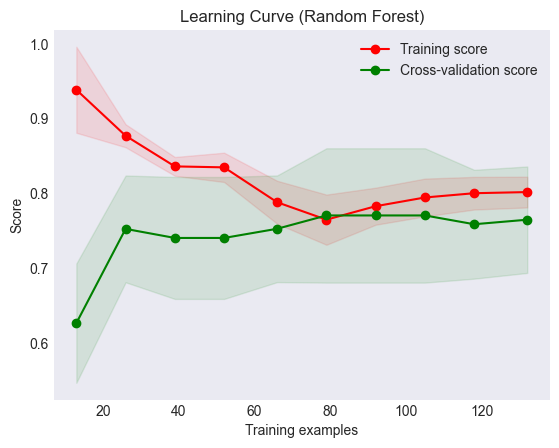

In [553]:


from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plotting the learning curve for the RandomForestClassifier
plot_learning_curve(rf_classifier, "Learning Curve (Random Forest)", X_top_features, y, cv=skf, n_jobs=4)
plt.savefig('charts/learning_curve.png', dpi=300, bbox_inches='tight', pad_inches=0.1, 
            transparent=True, facecolor='white')
plt.show()



In [554]:
import shap
import matplotlib.pyplot as plt
import matplotlib

# Switch matplotlib backend to 'Agg' for programmatic saving
matplotlib.use('Agg')

# 'rf_classifier' and 'X_fold_test' are defined
# Create the SHAP Explainer object
explainer = shap.TreeExplainer(rf_classifier)

# Calculate SHAP values for your test set
shap_values = explainer.shap_values(X_fold_test)

# Generate the SHAP summary plot for class 1
shap.summary_plot(shap_values[1], X_fold_test, show=False)

# Format the title with 'Salmonella Typhimurium' in italics
title_text = "Feature impact on predicting anti-$\it{Salmonella\ Typhimurium}$ activity"
plt.title(title_text, pad=20)

# Save the plot
plt.savefig("charts/shap_summary_plot_class_1.png", dpi=300, bbox_inches='tight', pad_inches=0.1,
            transparent=True, facecolor='white')

# Clear the figure to avoid conflicts with future plots
plt.clf()

# Switch back to the interactive backend if needed
matplotlib.use('module://ipykernel.pylab.backend_inline')

print("Plot saved as 'shap_summary_plot_class_1.png'.")


Plot saved as 'shap_summary_plot_class_1.png'.


https://www.kaggle.com/code/rafjaa/dealing-with-very-small-datasets

In [513]:
import pandas as pd
import os

# Load the data
file_path = 'aggregated_plants.csv'
df = pd.read_csv(file_path)

# List of important features from the model 
important_features = [
    'Bit_875',
    'Bit_549',
    'Bit_1607',
    'Bit_383',
    'Bit_1602',
    'Bit_1750',
    'Bit_1365',
    'Bit_1930',
    'Bit_1853',
    'Bit_1950',
    'Bit_171',
    'Bit_741',
    'Bit_287',
    'Bit_1574',
    'Bit_1309'
]



save_dir = './features/' 

# Check if the directory exists, if not, create it
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Iterating through each important feature
for feature in important_features:
    # Filter rows where the feature is present (1)
    feature_present_df = df[df[feature] == 1]
    
    # Drop all other 'Bit_' columns except the one in focus
    columns_to_drop = [col for col in df.columns if col.startswith('Bit_') and col != feature]
    feature_present_df = feature_present_df.drop(columns=columns_to_drop)
    
    # Define the new file path
    new_file_path = save_dir + f"{feature}.csv"
    
    # Save the filtered rows to a new CSV file
    feature_present_df.to_csv(new_file_path, index=False)
    
    print(f"Rows where {feature} is present and all other Bit_ columns are removed have been saved to '{new_file_path}'")


Rows where Bit_875 is present and all other Bit_ columns are removed have been saved to './features/Bit_875.csv'
Rows where Bit_549 is present and all other Bit_ columns are removed have been saved to './features/Bit_549.csv'
Rows where Bit_1607 is present and all other Bit_ columns are removed have been saved to './features/Bit_1607.csv'
Rows where Bit_383 is present and all other Bit_ columns are removed have been saved to './features/Bit_383.csv'
Rows where Bit_1602 is present and all other Bit_ columns are removed have been saved to './features/Bit_1602.csv'
Rows where Bit_1750 is present and all other Bit_ columns are removed have been saved to './features/Bit_1750.csv'
Rows where Bit_1365 is present and all other Bit_ columns are removed have been saved to './features/Bit_1365.csv'
Rows where Bit_1930 is present and all other Bit_ columns are removed have been saved to './features/Bit_1930.csv'
Rows where Bit_1853 is present and all other Bit_ columns are removed have been saved 

In [514]:
import pandas as pd
import os
import ast
from collections import Counter
import glob

def safe_literal_eval(s):
    dict_strings = [d.strip() for d in s.split(';') if d.strip()]
    all_dicts = {}
    for dict_str in dict_strings:
        try:
            all_dicts.update(ast.literal_eval(dict_str))
        except Exception as e:
            print(f"Failed to parse part: {dict_str}\nError: {e}")
    return all_dicts

def preprocess_bit_name(bit_name):
    bit_number = bit_name.replace('Bit_', '').replace('.csv', '')
    return int(bit_number)

features_dir = '/Users/mariiakokina/Documents/eo_database/random_forest/features/'
reorganized_plants_path = '/Users/mariiakokina/Documents/eo_database/random_forest/reorganized_plants_filtered.csv'
combined_chemicals_path = '/Users/mariiakokina/Documents/eo_database/initial_data/combined_chemicals_smiles.csv'

reorganized_plants_df = pd.read_csv(reorganized_plants_path)
combined_chemicals_df = pd.read_csv(combined_chemicals_path)  # Load the combined chemicals data
reorganized_plants_df = reorganized_plants_df.drop_duplicates(subset=['Plant_Species', 'Chemical'])

assert 'Concentration' in reorganized_plants_df.columns, "Concentration column not found in the reorganized plants data!"

bit_files = glob.glob(os.path.join(features_dir, 'Bit_*.csv'))

for bit_file in bit_files:
    bit_name = os.path.basename(bit_file)
    bit_name = bit_name.replace('.csv', '')

    new_bit_file = os.path.join(features_dir, f"{bit_name}_updated.csv")

    bit_df = pd.read_csv(bit_file)

    bit_df['BitInterpretations'] = bit_df['BitInterpretations'].apply(safe_literal_eval)

    if 'SMILES' not in bit_df.columns:
        bit_df.insert(3, 'SMILES', '')
    if 'Chemical' not in bit_df.columns:
        bit_df.insert(4, 'Chemical', '')
    if 'Chemical_name' not in bit_df.columns:  # Add Chemical_name column if it doesn't exist
        bit_df.insert(5, 'Chemical_name', '')

    expanded_rows = []

    for index, row in bit_df.iterrows():
        plant_species = row['Plant_Species']
        bit_interpretations = row['BitInterpretations']
        bit_number = preprocess_bit_name(bit_name)

        if bit_number in bit_interpretations:
            interpreted_bit = str(bit_interpretations[bit_number])
        else:
            interpreted_bit = ''

        matching_rows = reorganized_plants_df[
            (reorganized_plants_df['Plant_Species'].str.lower() == plant_species.lower()) &
            (reorganized_plants_df[bit_name] == 1)]

        for _, match in matching_rows.iterrows():
            new_row = row.copy()
            new_row['SMILES'] = match['SMILES']
            new_row['Chemical'] = match['Chemical']
            new_row['BitInterpretations'] = interpreted_bit
            new_row['Chemical_name'] = combined_chemicals_df[combined_chemicals_df['SMILES'] == match['SMILES']]['Chemical Name'].iloc[0]

            # Ensure matching both 'SMILES' and 'Plant_Species'
            concentration_match = reorganized_plants_df[
                (reorganized_plants_df['SMILES'] == match['SMILES']) & 
                (reorganized_plants_df['Plant_Species'].str.lower() == plant_species.lower())
            ]['Concentration']

            new_row['Concentration'] = concentration_match.iloc[0] if not concentration_match.empty else None

            expanded_rows.append(new_row)

    expanded_bit_df = pd.DataFrame(expanded_rows)

    # Remove the 'Chemical' column as it's no longer needed
    expanded_bit_df = expanded_bit_df.drop(columns=['Chemical'])

    expanded_bit_df = expanded_bit_df.sort_values(by='Chemical_name', ascending=True)

    expanded_bit_df.to_csv(new_bit_file, index=False)

    print(f"Updated {bit_name} with individual SMILES, Chemical names from combined file has been saved to {new_bit_file}")

print("All Bit files have been processed and updated with individual SMILES-Chemical pairs, Chemical names, and Concentrations.")


Updated Bit_1930 with individual SMILES, Chemical names from combined file has been saved to /Users/mariiakokina/Documents/eo_database/SOM/features/Bit_1930_updated.csv
Updated Bit_383 with individual SMILES, Chemical names from combined file has been saved to /Users/mariiakokina/Documents/eo_database/SOM/features/Bit_383_updated.csv
Updated Bit_1853 with individual SMILES, Chemical names from combined file has been saved to /Users/mariiakokina/Documents/eo_database/SOM/features/Bit_1853_updated.csv
Updated Bit_741 with individual SMILES, Chemical names from combined file has been saved to /Users/mariiakokina/Documents/eo_database/SOM/features/Bit_741_updated.csv
Updated Bit_875 with individual SMILES, Chemical names from combined file has been saved to /Users/mariiakokina/Documents/eo_database/SOM/features/Bit_875_updated.csv
Updated Bit_1365 with individual SMILES, Chemical names from combined file has been saved to /Users/mariiakokina/Documents/eo_database/SOM/features/Bit_1365_upda

In [516]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors, Draw
import os

important_features = [
    'Bit_875',
    'Bit_549',
    'Bit_1607',
    'Bit_383',
    'Bit_1602',
    'Bit_1750',
    'Bit_1365',
    'Bit_1930',
    'Bit_1853',
    'Bit_1950',
    'Bit_171',
    'Bit_741',
    'Bit_287',
    'Bit_1574',
    'Bit_1309'
]

# Define the output folder for SVG images
output_folder = 'visualizations'  # Adjust as needed
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

for feature in important_features:
    bit_number = feature.split('_')[1]  # Extract the bit number from the feature name
    updated_file_path = f'features/{feature}_updated.csv'  # Construct the file path dynamically
    
    try:
        df = pd.read_csv(updated_file_path)
    except FileNotFoundError:
        print(f"File {updated_file_path} not found, skipping.")
        continue

    bit_to_visualize = int(bit_number)  # Convert the bit number to an integer

    for idx, row in df.drop_duplicates(subset='SMILES').iterrows():
        smiles = row['SMILES']
        chemical_name = row.get('Chemical_name', 'Unnamed_Chemical')  # Default name if not present
        plant_species = row.get('Plant_Species', 'UnknownSpecies').split()[:2]  # Get first two words of plant species
        concentration = row.get('Concentration', 0)  # Get concentration value, default to 0 if not present

        # Generate a molecule from the SMILES string
        mol = Chem.MolFromSmiles(smiles)
        if not mol: continue  # Skip if molecule can't be created

        # Generate a Morgan fingerprint and save information about the bits that are set
        bit_info = {}
        fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048, bitInfo=bit_info)

        if bit_to_visualize in bit_info:
            # Visualize the first example of the bit setting
            whichExample = 0  # Always use the first example
            img = Draw.DrawMorganBit(mol, bit_to_visualize, bit_info, whichExample=whichExample, useSVG=True)
            
            # Ensure the chemical name, plant species, and concentration are filesystem safe
            safe_chemical_name = ''.join(e for e in chemical_name if e.isalnum())
            safe_plant_species = '_'.join(''.join(e for e in word if e.isalnum()) for word in plant_species)
            safe_concentration = ''.join(e for e in str(concentration) if e.isdigit() or e == '.')  # Convert float to string

            # Filename includes the bit, chemical name, plant species, and concentration
            svg_file_path = os.path.join(output_folder, f"bit_{bit_to_visualize}_{safe_chemical_name}_{safe_plant_species}_conc_{safe_concentration}.svg")
            with open(svg_file_path, "w") as svg_file:
                svg_file.write(img.data)
            print(f"Saved SVG image to {svg_file_path}")


Saved SVG image to visualizations/bit_875_2Hydroxy4methoxyacetophenone_Rheum_palmatum_conc_0.162.svg
Saved SVG image to visualizations/bit_875_Allyl2345tetramethoxybenzene_Petroselinum_crispum_conc_0.2594.svg
Saved SVG image to visualizations/bit_875_Carvacrol_Artemisia_chamaemelifolia_conc_0.163.svg
Saved SVG image to visualizations/bit_875_Eugenol_Artemisia_scoparia_conc_0.3.svg
Saved SVG image to visualizations/bit_875_Eugenylacetate_Eugenia_caryophyllus_conc_0.205.svg
Saved SVG image to visualizations/bit_875_Methylthymol_Thymus_richardii_conc_0.124.svg
Saved SVG image to visualizations/bit_875_Myristicin_Oliveria_decumbens_conc_0.096.svg
Saved SVG image to visualizations/bit_875_Thymol_Oliveria_decumbens_conc_0.372.svg
Saved SVG image to visualizations/bit_549_Bicyclogermacrene_Neolitsea_brassii_conc_0.126.svg
Saved SVG image to visualizations/bit_549_Isopinocamphone_Artemisia_alba_conc_0.346.svg
Saved SVG image to visualizations/bit_549_Ledol_Guerea_macrophylla_conc_0.139.svg
Sav

Saved SVG image to visualizations/bit_1309_Menthone_Agathosma_betulina_conc_0.0982.svg
Saved SVG image to visualizations/bit_1309_Valencene_Vitis_vinifera_conc_0.318.svg
Saved SVG image to visualizations/bit_1309_Viridiflorene_Laurus_nobilis_conc_0.122.svg
Saved SVG image to visualizations/bit_1309_alphaThujone_Salvia_officinalis_conc_0.234.svg
Saved SVG image to visualizations/bit_1309_betaThujone_Achillea_millefolium_conc_0.135.svg


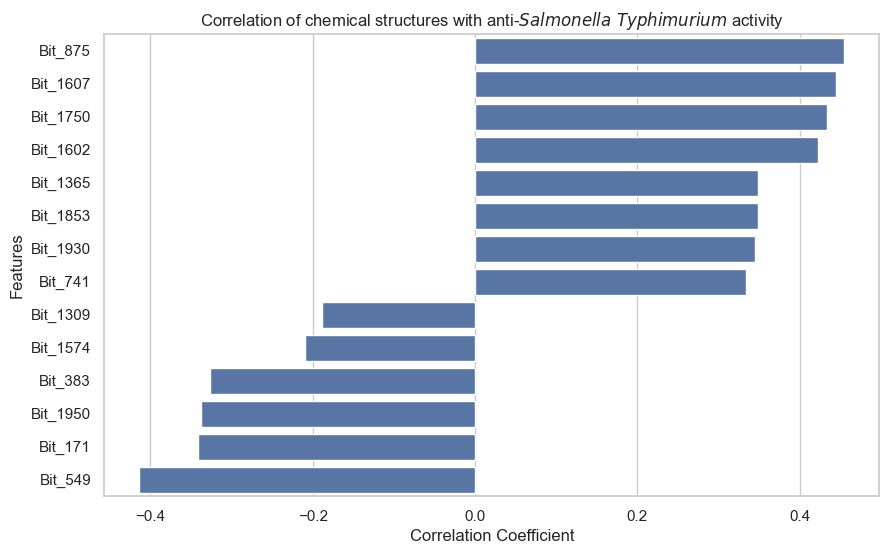

In [581]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest, ExtraTreesClassifier
from sklearn.model_selection import train_test_split

#  'features_filtered', 'target_filtered', and 'indices' are already defined

# Selecting the top features for analysis, excluding 'Bit_287'
top_feature_names = features_filtered.columns[indices[:TOP_FEATURES]]
# Filter out 'Bit_287' from the selected features if it exists
top_feature_names = top_feature_names[top_feature_names != 'Bit_287']
X_top_features = features_filtered[top_feature_names]
y = target_filtered

# Combine the top features and the target variable into a single DataFrame for correlation analysis
correlation_data = X_top_features.copy()
correlation_data['Target'] = y

# Calculate the correlation matrix with the target
corr_with_target = correlation_data.corr()['Target'].drop('Target').sort_values(ascending=False)

# Plotting the correlation with the target
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Correlation of chemical structures with anti-$\it{Salmonella\ Typhimurium}$ activity')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# Calculate the correlation matrix among top features
corr_matrix_top_features = X_top_features.corr()


In [556]:
# Export the correlation between chemical features and the target variable to a CSV file
corr_with_target.to_csv('chemical_target_correlation.csv', header=True)
print("Correlation data exported to 'chemical_target_correlation.csv'")

# Export the correlation matrix of top features to a CSV file
corr_matrix_top_features.to_csv('top_feature_correlation_matrix.csv', header=True)
print("Correlation matrix of top features exported to 'top_feature_correlation_matrix.csv'")



Correlation data exported to 'chemical_target_correlation.csv'
Correlation matrix of top features exported to 'top_feature_correlation_matrix.csv'


In [557]:
import pandas as pd
import ast  

def get_unique_structures_info(bit_name, correlation_coefficient):
    bit_file_path = f'features/{bit_name}_updated.csv'
    unique_structures_info = {}

    try:
        bit_df = pd.read_csv(bit_file_path)
        for _, row in bit_df.iterrows():
            interpretation = row['BitInterpretations']
            try:
                interpretation_list = ast.literal_eval(interpretation)
                for item in interpretation_list:
                    if len(item) == 4:
                        structure = item[3]
                        if structure not in unique_structures_info:
                            unique_structures_info[structure] = {
                                'SMILES': row['SMILES'],
                                'Chemical_name': row['Chemical_name'],
                                'Correlation_Coefficient': correlation_coefficient
                            }
            except:
                continue
    except FileNotFoundError:
        print(f"File not found: {bit_file_path}")
    except Exception as e:
        print(f"An error occurred while processing {bit_name}: {e}")

    return unique_structures_info

# Load the chemical target correlation file
chemical_correlation_file_path = 'chemical_target_correlation.csv'
chemical_correlation_df = pd.read_csv(chemical_correlation_file_path)

# Prepare a new DataFrame for merged data
merged_data = []

for index, row in chemical_correlation_df.iterrows():
    bit_name = row.iloc[0]
    correlation_coefficient = row.iloc[1]  # Get the correlation coefficient
    structures_info = get_unique_structures_info(bit_name, correlation_coefficient)
    for structure, info in structures_info.items():
        merged_data.append({
            'Bit_name': bit_name,
            'Structure': structure,
            'SMILES': info['SMILES'],
            'Chemical_name': info['Chemical_name'],
            'Correlation_Coefficient': info['Correlation_Coefficient']
        })

# Convert the merged data into a DataFrame
merged_df = pd.DataFrame(merged_data)

# Optionally, you can save this merged DataFrame to a CSV file
merged_df.to_csv('merged_chemical_data.csv', index=False)

print(merged_df.head())  # Print the first few rows of the merged DataFrame


   Bit_name Structure                    SMILES  \
0   Bit_875       ccc  CC(=O)C1=C(C=C(C=C1)OC)O   
1  Bit_1607    cc(c)O  CC(=O)C1=C(C=C(C=C1)OC)O   
2  Bit_1750       ccc        COc1ccc(\C=C\C)cc1   
3  Bit_1602        cO  CC(=O)C1=C(C=C(C=C1)OC)O   
4  Bit_1602        CO    CC(C)C1CCC(C)=C(O)C1=O   

                      Chemical_name  Correlation_Coefficient  
0  2-Hydroxy-4-methoxy-acetophenone                 0.454575  
1  2-Hydroxy-4-methoxy-acetophenone                 0.445048  
2                      (E)-Anethole                 0.433490  
3  2-Hydroxy-4-methoxy-acetophenone                 0.422843  
4                        Diosphenol                 0.422843  


After manual inspection I removed the reduntant structures created as a Morgan fingerprint missmatch and merged together diffent bits assigned to the same structure.

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


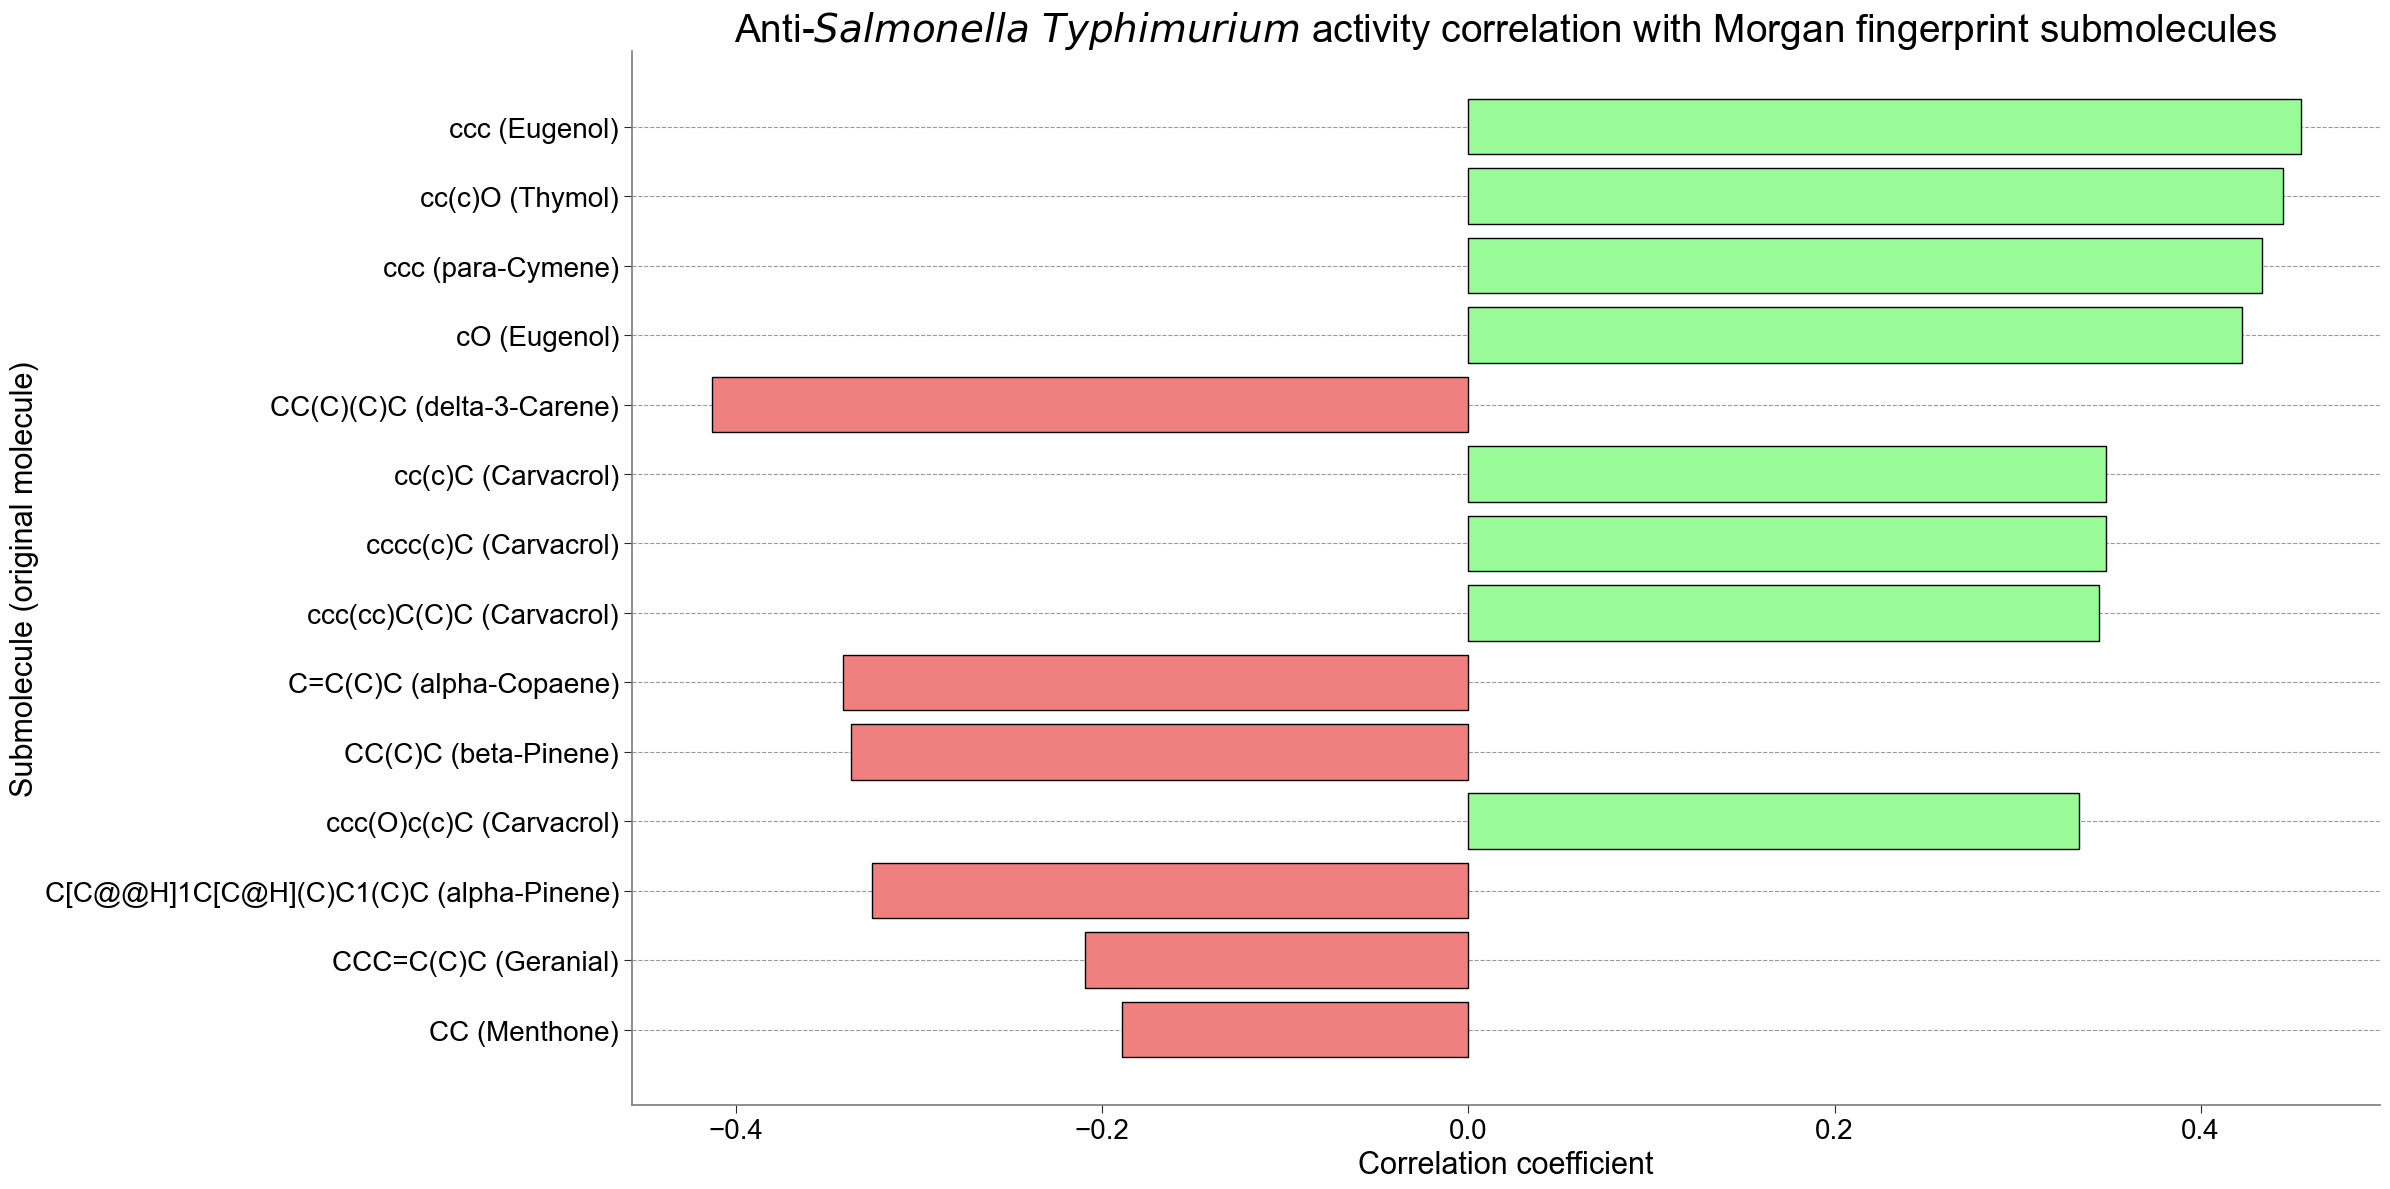

In [558]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged chemical data file
merged_data_file_path = 'merged_chemical_data.csv'  
merged_df = pd.read_csv(merged_data_file_path)

# Create a new column that combines 'Structure' with 'Chemical_name'
merged_df['Structure_with_Name'] = merged_df['Structure'] + ' (' + merged_df['Chemical_name'] + ')'

# Sort the DataFrame based on the absolute value of the Correlation_Coefficient in descending order
merged_df_sorted = merged_df.copy()
merged_df_sorted['Absolute_Correlation'] = merged_df_sorted['Correlation_Coefficient'].abs()
merged_df_sorted = merged_df_sorted.sort_values('Absolute_Correlation', ascending=False).drop('Absolute_Correlation', axis=1)

# Set the style of the plot to be more aesthetically pleasing
plt.style.use('seaborn-ticks')  
plt.figure(figsize=(24, 12))

# Create a bar plot with different colors for positive and negative correlations
colors = ['palegreen' if x >= 0 else 'lightcoral' for x in merged_df_sorted['Correlation_Coefficient']]
bars = plt.barh(merged_df_sorted['Structure_with_Name'], merged_df_sorted['Correlation_Coefficient'], color=colors)

# Add horizontal grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.8, color='grey')

# Hide the top and right spines to reduce visual clutter
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set the colors of the remaining spines to light grey
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_color('grey')

# Adjust the x-axis and y-axis label sizes and colors for better visibility
plt.xlabel('Correlation coefficient', fontsize=22, color='black')
plt.ylabel('Submolecule (original molecule)', fontsize=22, color='black')

# Set the title of the plot with increased font size and color
plt.title(r'Anti-$\it{Salmonella\ Typhimurium}$ activity correlation with Morgan fingerprint submolecules',
          fontsize=28, color='black')

# Adjust y-axis tick label font
plt.gca().tick_params(axis='y', labelsize=20, labelcolor='black', labelrotation=0)
plt.gca().tick_params(axis='x', labelsize=20, labelcolor='black', labelrotation=0)

# Adjust layout to ensure everything fits without overlapping
plt.tight_layout()

# Enhance the color and style of the bar borders for better aesthetics
for bar in bars:
    bar.set_edgecolor('black')

# Invert the y-axis so that the highest positive value is at the top
plt.gca().invert_yaxis()

# Save the plot with 
plt.savefig('charts/correlation_plot.png', dpi=300)

# Show the plot 
plt.show()


In [30]:
import pandas as pd

# Load the datasets
merged_chemical_data_path = 'merged_chemical_data.csv'  
top_feature_correlation_matrix_path = 'top_feature_correlation_matrix.csv' 

merged_df = pd.read_csv(merged_chemical_data_path)
correlation_matrix_df = pd.read_csv(top_feature_correlation_matrix_path, index_col=0)

# Create a dictionary mapping Bit_name to "Structure (Chemical_name)"
merged_df['Structure_with_Chemical'] = '"' + merged_df['Structure'] + '" (' + merged_df['Chemical_name'] + ')'
bit_to_structure = pd.Series(merged_df.Structure_with_Chemical.values, index=merged_df.Bit_name).to_dict()

# Append the structures to the column names in the correlation matrix, maintaining both and adding quotes
correlation_matrix_df.columns = [col + " - " + bit_to_structure.get(col, "") for col in correlation_matrix_df.columns]
correlation_matrix_df.index = [idx + " - " + bit_to_structure.get(idx, "") for idx in correlation_matrix_df.index]

# Save the modified correlation matrix to a new CSV file
correlation_matrix_df.to_csv('modified_top_feature_correlation_matrix.csv')
print("Modified correlation matrix saved to 'modified_top_feature_correlation_matrix.csv'")


Modified correlation matrix saved to 'modified_top_feature_correlation_matrix.csv'


/var/folders/x1/3wgmd54s6b7f7xc3rq_f0tdw0000gn/T/ipykernel_10174/2930691787.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


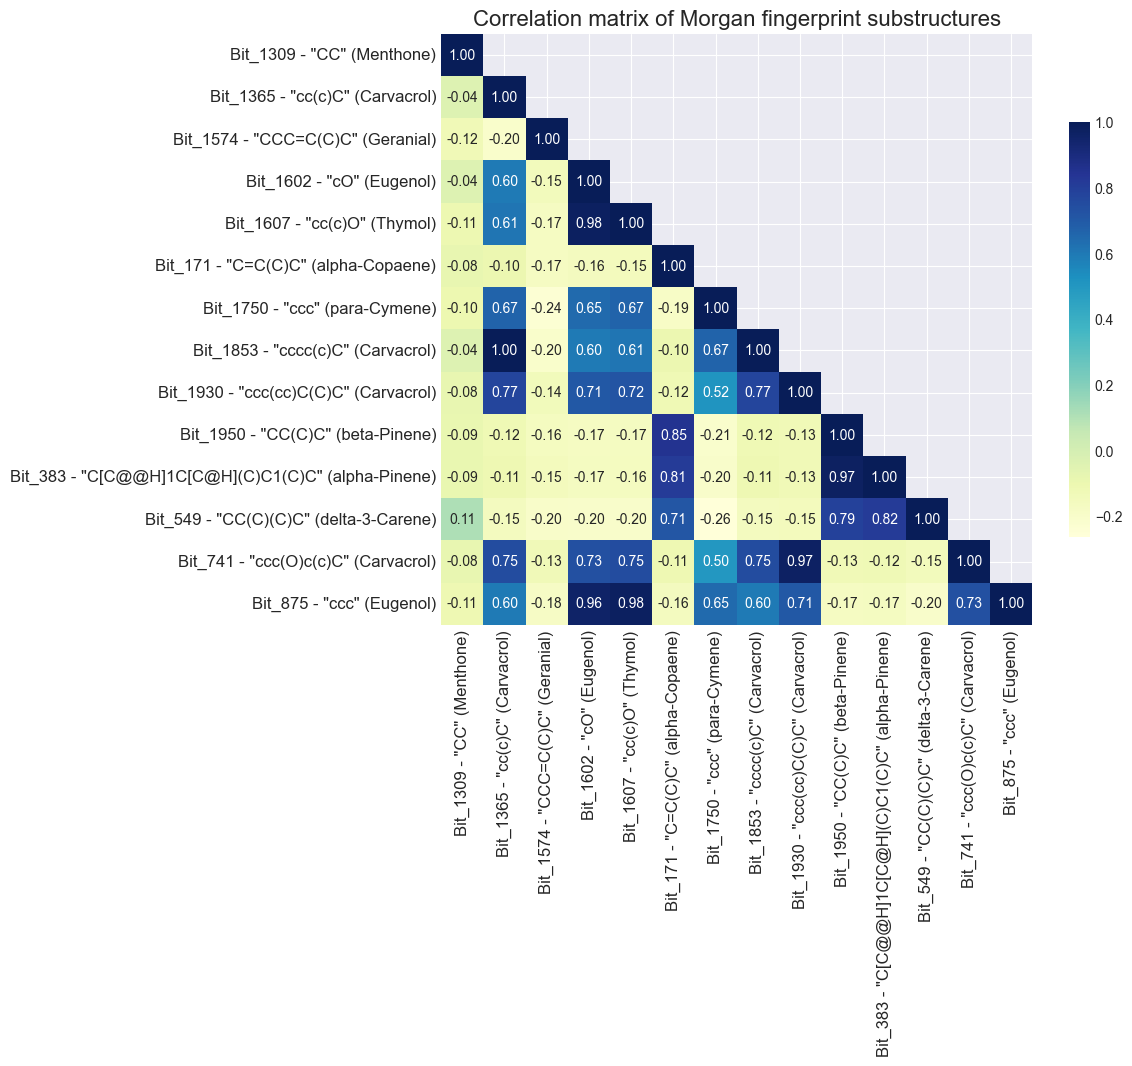

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the modified correlation matrix
modified_corr_matrix_path = 'modified_top_feature_correlation_matrix.csv'
corr_matrix = pd.read_csv(modified_corr_matrix_path, index_col=0)

# Sort the correlation matrix by index (which typically are the feature names)
sorted_corr_matrix = corr_matrix.sort_index().sort_index(axis=1)

# Keep only the lower triangle of the matrix by setting the upper triangle to NaN
for i in range(len(sorted_corr_matrix)):
    sorted_corr_matrix.iloc[:i, i] = float('nan')

# Plotting the heatmap with the 'YlGnBu' colormap
plt.figure(figsize=(12, 12))  
sns.heatmap(sorted_corr_matrix, annot=True, cmap='YlGnBu', square=True, cbar_kws={"shrink": .5}, fmt=".2f")
plt.title('Correlation matrix of Morgan fingerprint substructures', fontsize=16)
plt.xticks(rotation=90, fontsize=12)  # Increased rotation and adjusted font size
plt.yticks(fontsize=12)

# Using seaborn style
plt.style.use('seaborn-darkgrid')

# Apply tight layout to improve spacing between plot elements
plt.tight_layout()

# Save the plot
plt.savefig('charts/sorted_corr_heatmap.png', dpi=300, bbox_inches='tight')

plt.show()


The above cells are combined bellow for easier parameters testing.

Top features:
1. feature Bit_875 (0.0309)
2. feature Bit_549 (0.0248)
3. feature Bit_1607 (0.0197)
4. feature Bit_383 (0.0189)
5. feature Bit_1602 (0.0171)
6. feature Bit_1750 (0.0164)
7. feature Bit_1365 (0.0158)
8. feature Bit_1930 (0.0155)
9. feature Bit_1853 (0.0153)
10. feature Bit_1950 (0.0147)
11. feature Bit_171 (0.0142)
12. feature Bit_741 (0.0142)
13. feature Bit_287 (0.0131)
14. feature Bit_1574 (0.0130)
15. feature Bit_1309 (0.0122)


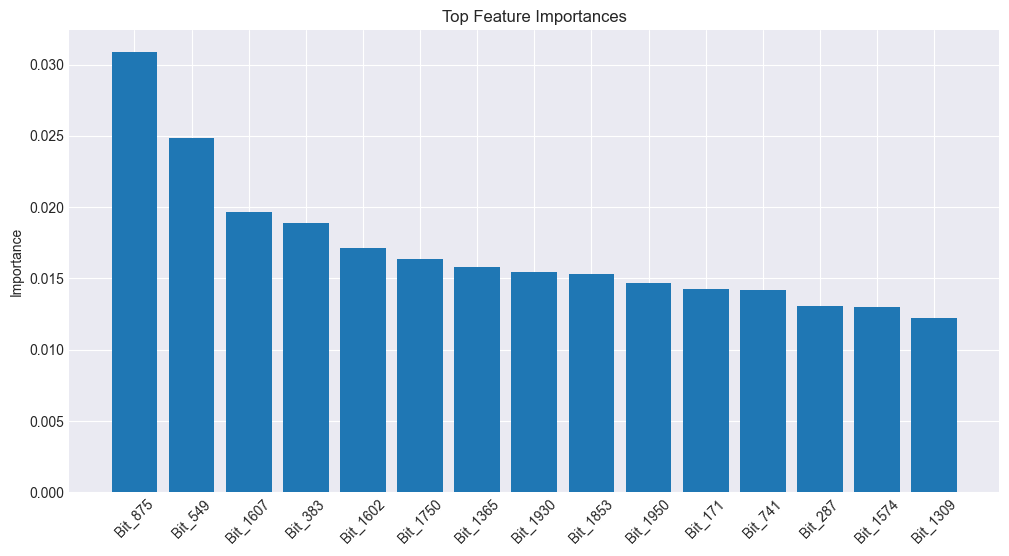

Training Set Metrics:
      Fold  Accuracy  TPR (Recall)       NPV
0        1  0.772727      0.761194  0.761194
1        2  0.804511      0.779412  0.782609
2        3  0.796992      0.776119  0.782609
3        4  0.789474      0.776119  0.779412
4        5  0.827068      0.805970  0.811594
5  Average  0.798154      0.779763  0.783483

Testing Set Metrics:
      Fold  Accuracy  TPR (Recall)       NPV
0        1  0.852941      0.882353  0.875000
1        2  0.757576      0.750000  0.764706
2        3  0.787879      0.764706  0.764706
3        4  0.787879      0.823529  0.800000
4        5  0.636364      0.647059  0.625000
5  Average  0.764528      0.773529  0.765882


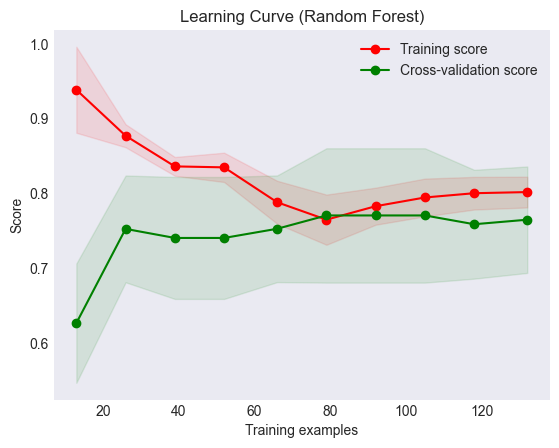

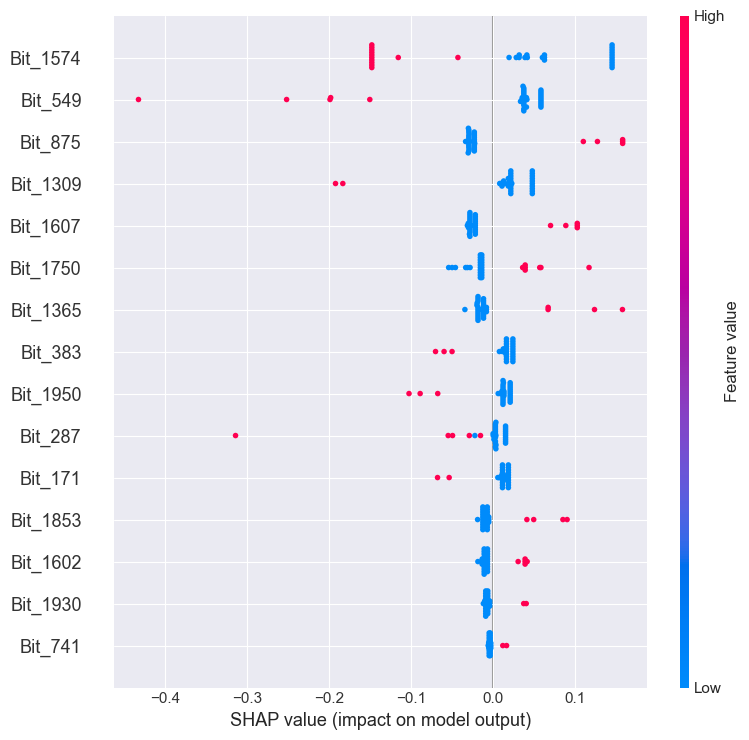

In [508]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest, ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance


# Load the dataset
df = pd.read_csv('aggregated_plants.csv')

# Dropping non-relevant columns
df = df.drop(columns=['Plant_Species', 'Reference', 'BitInterpretations'])

# Separating features and target
features = df.drop('Salmonella Typhimurium', axis=1)
target = df['Salmonella Typhimurium']

# Apply Isolation Forest for outlier detection and removal
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers_pred = iso_forest.fit_predict(features)
mask = outliers_pred != -1
features_filtered = features[mask]
target_filtered = target[mask]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_filtered, target_filtered, test_size=0.2, random_state=42)

# Define the number of top features
TOP_FEATURES = 15

# Use ExtraTreesClassifier to determine feature importances
forest = ExtraTreesClassifier(
    bootstrap=True, 
    criterion='entropy', 
    max_depth=15, 
    max_features='sqrt', 
    min_samples_leaf=2, 
    min_samples_split=4, 
    n_estimators=90, 
    random_state=42
)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]

# Print top features
print('Top features:')
top_features = []
for f in range(TOP_FEATURES):
    feature_name = X_train.columns[indices[f]]
    top_features.append(feature_name)
    print(f'{f + 1}. feature {feature_name} ({importances[indices[f]]:.4f})')

# Visualize feature importances
plt.figure(figsize=(12, 6))
plt.title('Top Feature Importances')
plt.bar(range(TOP_FEATURES), importances[indices], align='center')
plt.xticks(range(TOP_FEATURES), [X_train.columns[i] for i in indices], rotation=45)
plt.ylabel('Importance')
plt.show()


# Selecting the top features for training
top_feature_names = features_filtered.columns[indices[:TOP_FEATURES]]
X_top_features = features_filtered[top_feature_names]
y = target_filtered

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Lists to store metrics for each fold - Training
train_accuracies = []
train_true_positive_rates = []
train_negative_predictive_values = []

# Lists to store metrics for each fold - Testing
test_accuracies = []
test_true_positive_rates = []
test_negative_predictive_values = []

for train_index, test_index in skf.split(X_top_features, y):
    X_fold_train, X_fold_test = X_top_features.iloc[train_index], X_top_features.iloc[test_index]
    y_fold_train, y_fold_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on training data
    rf_classifier.fit(X_fold_train, y_fold_train)

    # Evaluate on training data
    y_train_pred = rf_classifier.predict(X_fold_train)
    train_accuracy = accuracy_score(y_fold_train, y_train_pred)
    train_tn, train_fp, train_fn, train_tp = confusion_matrix(y_fold_train, y_train_pred).ravel()
    train_TPR = train_tp / (train_tp + train_fn)
    train_NPV = train_tn / (train_tn + train_fn)
    
    train_accuracies.append(train_accuracy)
    train_true_positive_rates.append(train_TPR)
    train_negative_predictive_values.append(train_NPV)
    
    # Evaluate on testing data
    y_test_pred = rf_classifier.predict(X_fold_test)
    test_accuracy = accuracy_score(y_fold_test, y_test_pred)
    test_tn, test_fp, test_fn, test_tp = confusion_matrix(y_fold_test, y_test_pred).ravel()
    test_TPR = test_tp / (test_tp + test_fn)
    test_NPV = test_tn / (test_tn + test_fn)
    
    test_accuracies.append(test_accuracy)
    test_true_positive_rates.append(test_TPR)
    test_negative_predictive_values.append(test_NPV)

# Creating DataFrames to display results
train_results_df = pd.DataFrame({
    'Fold': list(range(1, 6)) + ['Average'],
    'Accuracy': train_accuracies + [np.mean(train_accuracies)],
    'TPR (Recall)': train_true_positive_rates + [np.mean(train_true_positive_rates)],
    'NPV': train_negative_predictive_values + [np.mean(train_negative_predictive_values)]
})

test_results_df = pd.DataFrame({
    'Fold': list(range(1, 6)) + ['Average'],
    'Accuracy': test_accuracies + [np.mean(test_accuracies)],
    'TPR (Recall)': test_true_positive_rates + [np.mean(test_true_positive_rates)],
    'NPV': test_negative_predictive_values + [np.mean(test_negative_predictive_values)]
})

print("Training Set Metrics:")
print(train_results_df)

print("\nTesting Set Metrics:")
print(test_results_df)


from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plotting the learning curve for the RandomForestClassifier
plot_learning_curve(rf_classifier, "Learning Curve (Random Forest)", X_top_features, y, cv=skf, n_jobs=4)
plt.show()

import shap
import matplotlib.pyplot as plt
import matplotlib


# Create the SHAP Explainer
explainer = shap.TreeExplainer(rf_classifier)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_fold_test)

# Clear the current figure to avoid duplications
plt.clf()

# Generate the SHAP summary plot for class 1
shap.summary_plot(shap_values[1], X_fold_test)

# Adjust the title spacing and add a title to the plot
# Use Matplotlib's text formatting to apply italics to 'Salmonella Typhimurium'
plt.title("Feature impact on model output for presence of anti-$\it{Salmonella\ Typhimurium}$ activity", pad=5, fontsize=12)

# Save the plot with the title
plt.savefig("shap_summary_plot_class_1_fixed.png", dpi=300, bbox_inches='tight')
plt.close()  # Close the plot to free up memory





In [44]:
publications = [108, 115, 177, 223, 248, 310, 364, 395, 401, 406, 517, 504, 598, 594, 641, 700, 900, 978, 976, 1056]
years = range(2004, 2023)

percentage_increases = []

for i in range(1, len(publications)):
    increase = ((publications[i] - publications[i-1]) / publications[i-1]) * 100
    percentage_increases.append(increase)

average_increase = sum(percentage_increases) / len(percentage_increases)
print(f"Average Annual Percentage Increase: {average_increase:.2f}%")


Average Annual Percentage Increase: 13.50%
